In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("dataset/IMDB Dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\samet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\samet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
df = df.drop_duplicates().reset_index(drop=True)

C:\Users\samet\AppData\Local\Temp\ipykernel_25268\2033337383.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["sentiment"],palette="coolwarm")


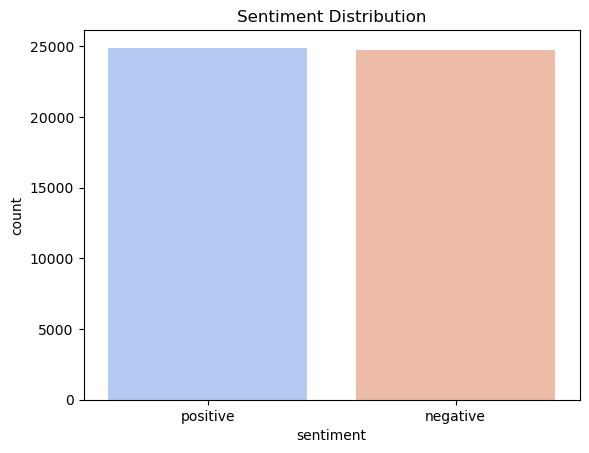

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x=df["sentiment"],palette="coolwarm")
plt.title("Sentiment Distribution")
plt.show()

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re



stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text) #removing html tag
    text = re.sub(r"[^a-zA-Z]", " ", text) #removing speical char
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens) 


In [8]:
df["clean_review"] = df["review"].apply(preprocess_text)

In [9]:
df["clean_review"][0]

'one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz m

In [10]:
df.drop("review",axis=1)

,sentiment,clean_review
0,positive,one reviewer mentioned watching oz episode hoo...
1,positive,wonderful little production filming technique ...
2,positive,thought wonderful way spend time hot summer we...
3,negative,basically family little boy jake think zombie ...
4,positive,petter mattei love time money visually stunnin...
...,...,...
49577,positive,thought movie right good job creative original...
49578,negative,bad plot bad dialogue bad acting idiotic direc...
49579,negative,catholic taught parochial elementary school nu...
49580,negative,going disagree previous comment side maltin on...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_review'])


y = df['sentiment'].map({'positive': 1, 'negative': 0})

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


y_pred = model.predict(X_test)

print("Accuracy.", accuracy_score(y_test, y_pred))
print("\nClassification Report : \n", classification_report(y_test, y_pred))
print("\nConfusion Matrix :\n",confusion_matrix(y_test,y_pred))

Accuracy. 0.8523747100937784

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      4939
           1       0.85      0.86      0.85      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917


Confusion Matrix :
 [[4167  772]
 [ 692 4286]]


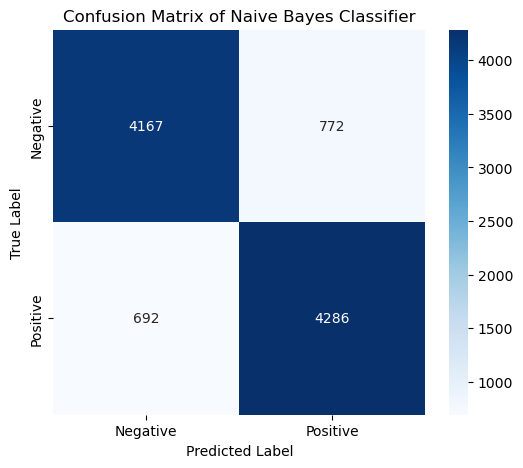

In [26]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "Positive"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Naive Bayes Classifier")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


feature_names = np.array(vectorizer.get_feature_names_out())


pos_probs = model.feature_log_prob_[1]  # class 1
neg_probs = model.feature_log_prob_[0]  # class 0

top_pos_idx = np.argsort(pos_probs)[-10:]
top_neg_idx = np.argsort(neg_probs)[-10:]

top_pos_words = feature_names[top_pos_idx]
top_pos_weights = pos_probs[top_pos_idx]

top_neg_words = feature_names[top_neg_idx]
top_neg_weights = neg_probs[top_neg_idx]


top_pos_probs = np.exp(top_pos_weights)
top_neg_probs = np.exp(top_neg_weights)


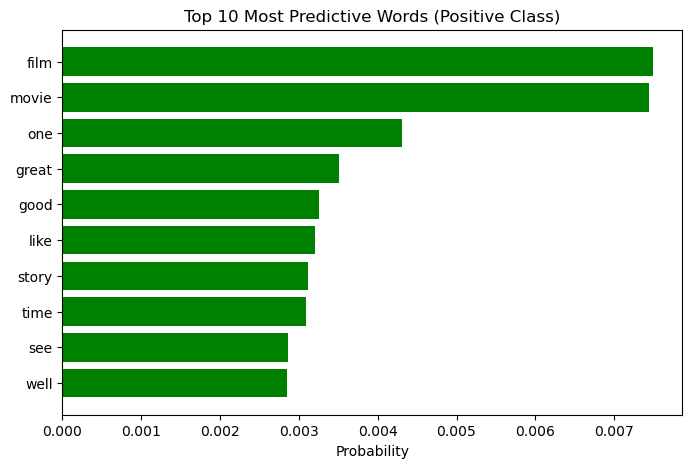

In [27]:
plt.figure(figsize=(8,5))
plt.barh(top_pos_words, top_pos_probs, color='green')
plt.title("Top 10 Most Predictive Words (Positive Class)")
plt.xlabel("Probability")
plt.show()


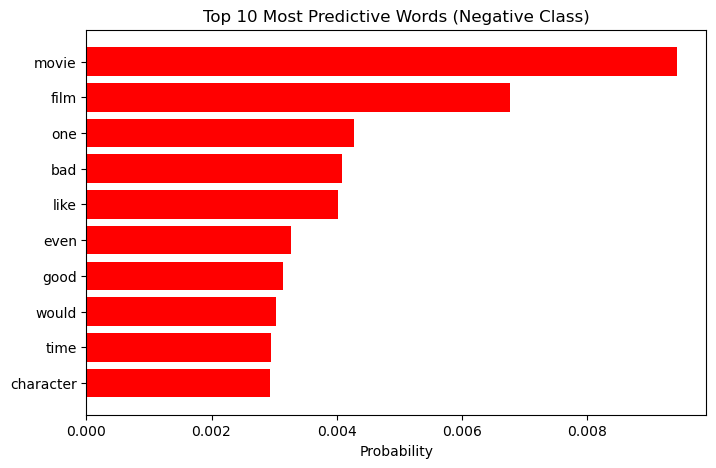

In [28]:
plt.figure(figsize=(8,5))
plt.barh(top_neg_words, top_neg_probs, color='red')
plt.title("Top 10 Most Predictive Words (Negative Class)")
plt.xlabel("Probability")
plt.show()

In [ ]:

wrong_indices = []
wrong_predictions_list = []

for i in range(len(y_test)):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    if actual != predicted:
        wrong_indices.append(y_test.index[i])
        wrong_predictions_list.append((i, actual, predicted))

print("MISCLASSIFIED EXAMPLES:")
print("=" * 80)

for j in range(min(2, len(wrong_predictions_list))):
    i, actual, predicted = wrong_predictions_list[j]
    idx = wrong_indices[j]
    
    print(f"\nExample {j+1}:")
    print(f"Original Review: {df.loc[idx, 'review'][:150]}...")
    print(f"Actual Sentiment: {'Positive' if actual == 1 else 'Negative'}")
    print(f"Predicted Sentiment: {'Positive' if predicted == 1 else 'Negative'}")
    print(f"\nPossible reasons for misclassification:")
    
    review_text = df.loc[idx, 'review'].lower()
    
    if 'but' in review_text or 'however' in review_text:
        print("- Review contains 'but' or 'however', model may struggle with complex sentences")
    
    if 'not' in review_text and ('good' in review_text or 'bad' in review_text):
        print("- Contains negation like 'not good' or 'not bad', model may misinterpret this")

MISCLASSIFIED EXAMPLES:

Example 1:
Original Review: "National Treasure" (2004) is a thoroughly misguided hodge-podge of plot entanglements that borrow from nearly every cloak and dagger government consp...
Actual Sentiment: Negative
Predicted Sentiment: Positive

Possible reasons for misclassification:
- Review contains 'but' or 'however', model may struggle with complex sentences
- Contains negation like 'not good' or 'not bad', model may misinterpret this

Example 2:
Original Review: The over-heated plot of "Bonjour tristesse" is taken from a juvenile first novel by Francoise Sagan, which became a best-seller, though God knows why....
Actual Sentiment: Negative
Predicted Sentiment: Positive

Possible reasons for misclassification:
- Review contains 'but' or 'however', model may struggle with complex sentences
- Contains negation like 'not good' or 'not bad', model may misinterpret this


In [32]:
def predict_sentiment(review_text):
    cleaned = preprocess_text(review_text)
    
    vectorized = vectorizer.transform([cleaned])
    
    prediction = model.predict(vectorized)[0]
    probability = model.predict_proba(vectorized)[0]
    
    sentiment = "Positive 😊" if prediction == 1 else "Negative 😞"
    confidence = max(probability) * 100
    
    print(f"Review: {review_text}")
    print(f"Prediction: {sentiment}")
    print(f"Confidence: %{confidence:.2f}")
    
    return prediction

In [33]:
reviews = [
    "Absolutely loved this movie! The story was captivating and the actors did an amazing job.",
    "Fantastic film! Beautiful visuals, great soundtrack, and I was completely immersed from start to finish.",
    "I hated this movie. The plot was confusing and the acting was awful. Total waste of time.",
    "Terrible film. Boring, predictable, and the characters made no sense. Very disappointed.",
    "The movie had some beautiful scenes and good acting, but the plot was too slow and the ending was unsatisfying."
]

for review in reviews:
    print(predict_sentiment(review))

Review: Absolutely loved this movie! The story was captivating and the actors did an amazing job.
Prediction: Positive 😊
Confidence: %86.12
1
Review: Fantastic film! Beautiful visuals, great soundtrack, and I was completely immersed from start to finish.
Prediction: Positive 😊
Confidence: %76.53
1
Review: I hated this movie. The plot was confusing and the acting was awful. Total waste of time.
Prediction: Negative 😞
Confidence: %96.14
0
Review: Terrible film. Boring, predictable, and the characters made no sense. Very disappointed.
Prediction: Negative 😞
Confidence: %90.94
0
Review: The movie had some beautiful scenes and good acting, but the plot was too slow and the ending was unsatisfying.
Prediction: Negative 😞
Confidence: %54.39
0
